# COVID19 in US

In [19]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Dropdown, Button
import matplotlib.pyplot as plt
from bqplot.traits import convert_to_date
import bqplot.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
uscovid = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

In [3]:
uscovid

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18115,11/14/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,11/15/2020 03:12:13 PM,NaN,NaN
18116,11/15/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,11/16/2020 06:40:02 PM,NaN,NaN
18117,11/16/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,11/17/2020 02:52:47 PM,NaN,NaN
18118,11/17/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,11/18/2020 02:57:46 PM,NaN,NaN


In [5]:
usdata = uscovid.drop(['pnew_case', 'pnew_death', 'created_at', 'consent_cases', 'consent_deaths'], axis = 1)
usdata.fillna(int(0))
date_x = pd.to_datetime(usdata['submission_date'])

In [18]:
dropdown = ipywidgets.Dropdown(description='States', options=usdata['state'].unique())
current_state = dropdown.value
fig_title_tmpl = 'Total COVID-19 cases/death in {}' # string template for title of the figure 
fig2 = plt.figure(title=fig_title_tmpl.format(current_state),animation_duration=1000)
fig2.layout.width = '900px'
yv = usdata.loc[usdata['state']==current_state]
totcase = plt.plot(date_x, yv['tot_cases'], colors=['green'])
totdeath = plt.plot(date_x, yv['tot_death'], colors=['red'])
plt.xlabel('Date')
plt.ylabel('Total cases/death')


# 1. create a callback which updates the plot when dropdown item is selected
def update_plot(*args):
    selected_state = dropdown.value
    yv = usdata.loc[usdata['state']==selected_state]
    # update the y attribute of the mark by selecting 
    # the column from the price data frame
    totcase.y = yv['tot_cases']
    totdeath.y = yv['tot_death']
    
    # update the title of the figure
    fig2.title = fig_title_tmpl.format(selected_state)
    plt.show()
    
# 2. register the callback by using the 'observe' method
dropdown.observe(update_plot, 'value')

# stack the dropdown and fig widgets using VBox
ipywidgets.VBox([dropdown, fig2])

Write up:
    The dataset is "United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv". The originazation who provides this data is CDC Case Task Force. URL: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36 The government website said "COVID-19 data will be made available to the public as summary or aggregate count files, including total counts of cases and deaths by state and by county." I think I am allowed to use it and publish it with visualization as long as I abide by the copyright. Size: 1365kb, 18120 rows and 15 columns.
    The data visualization I made is aiming at showing the Total COVID-19 cases and death in each US states from Feb. to Nov. Y asix is the total number, while x axis is the date.
    You can choose in the deropdown at the top of the plot. Switch to the state you want, for example if I want to check with Illinois then I will choose "IL". 
    Notice there will be 2 graph showing. I add plt.show() so you can zoom in/out, drag and save this plot. The total death and specific date is hard to tell in the oridinary graph, so you can zoom in to find the detial information you want.

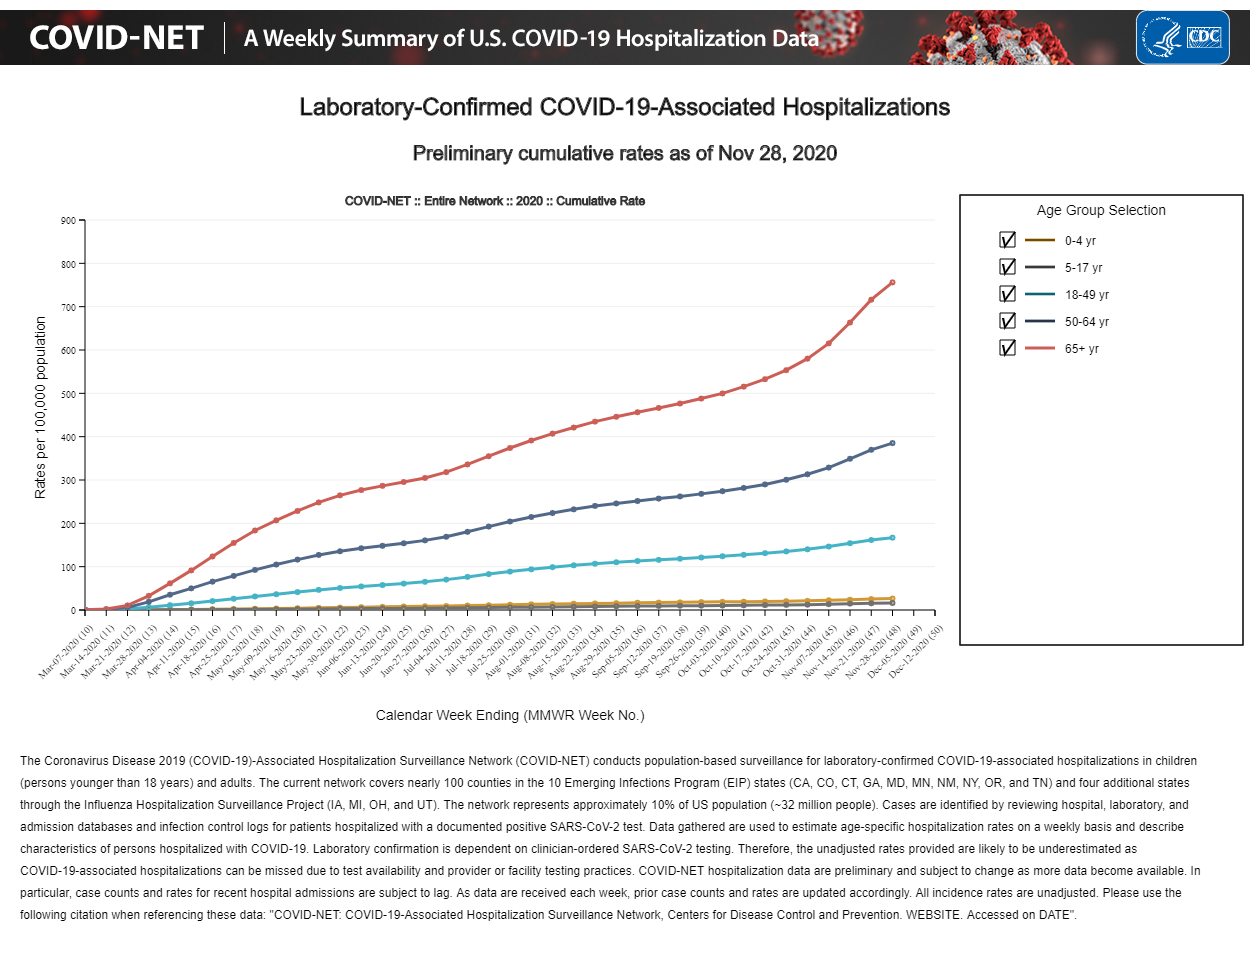

In [20]:
Image(filename='COVID-19-NET_Image.png') 

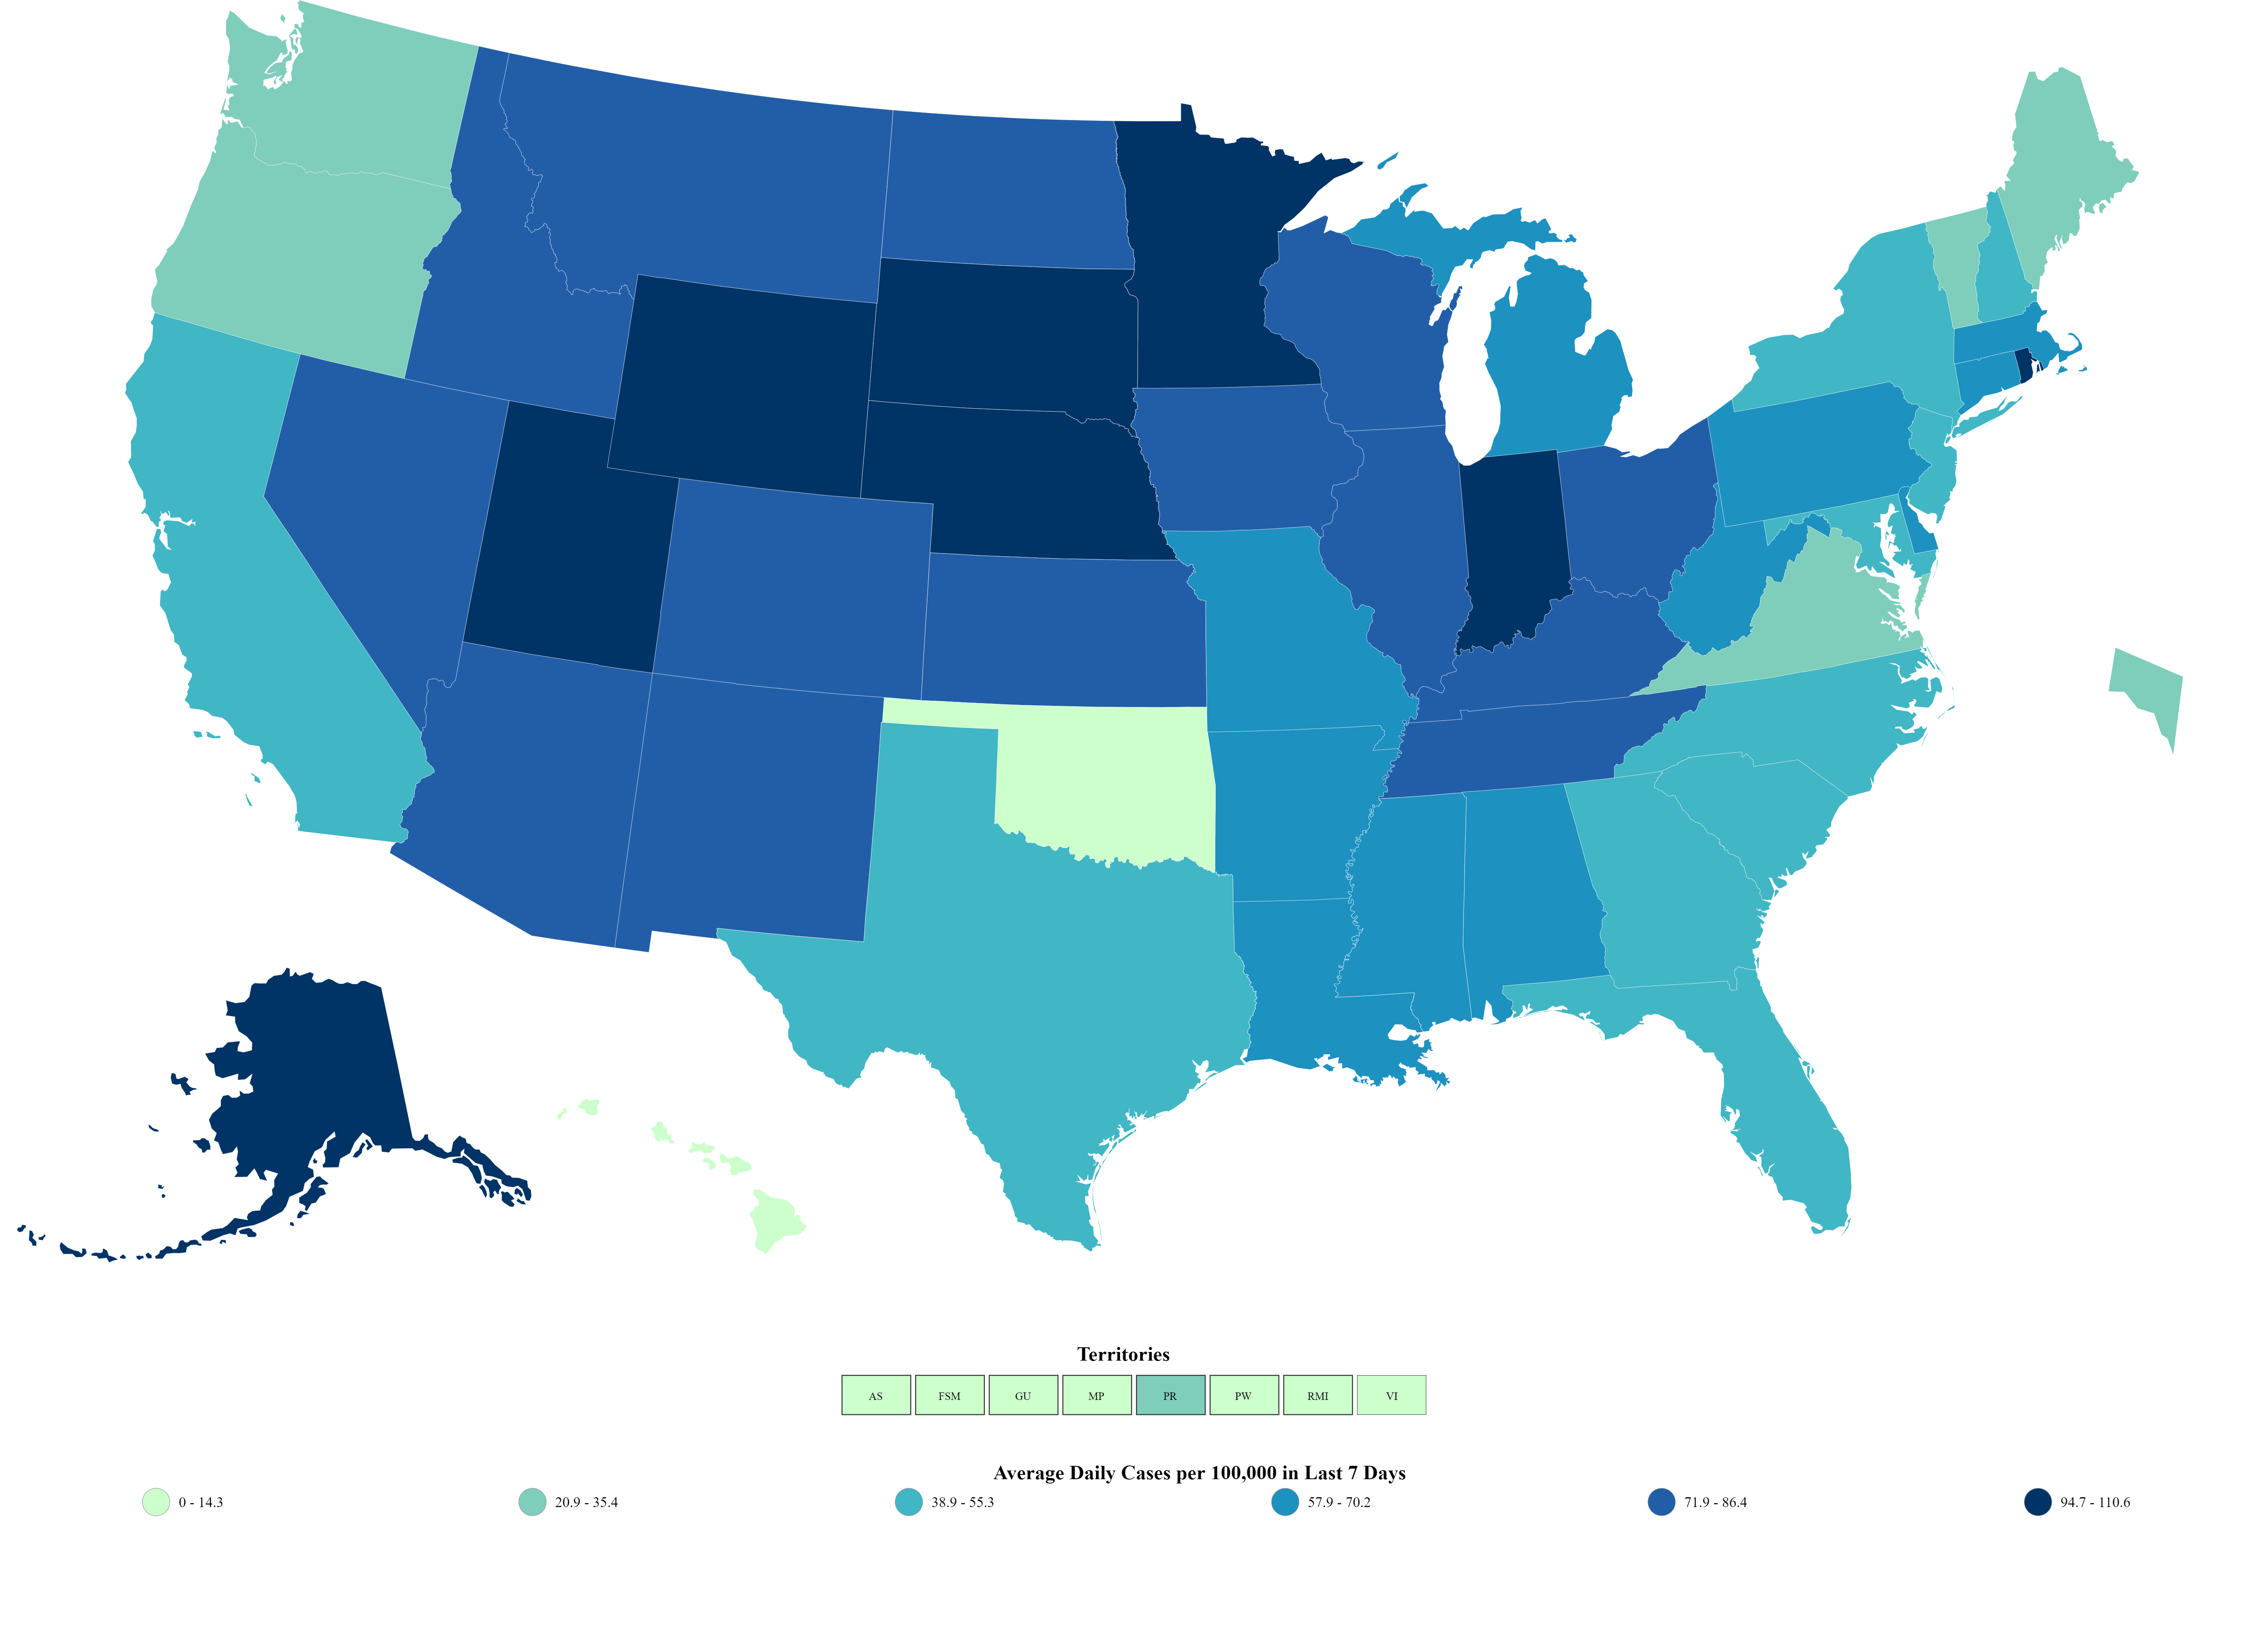

In [21]:
Image(filename='usa-maps.png') 

This two contextual data visualization shows the infection rete among different ages, and the daily case report in each state. The first one contains new information where my DV doesn't show, that is older ppl are more likely to get this virus. While the second plot can be derived by my DV, some states' case growing rate is rapid.

# Source
Primary dataset: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days
https://gis.cdc.gov/grasp/COVIDNet/COVID19_3.html